# Insurance Cost prediction
- This project aims to predict the medical insurance cost for individuals based on various factors such as age, BMI, smoking status, etc. The ability to predict insurance costs for individuals can be a valuable tool for insurance companies and policymakers. For this project, I am used machine learning techniques such as linear regression,random forest,decision tree,knn-neighbor to compare which model give me best accuracy and data visualization libraries like matplotlib and seaborn to build and evaluate the model.

- This dataset based on US health insurance cost.
- This dataset covers the target variable of 'insurance_price' (Continuous data) applied to an individual based on 6 features or variables: Smoking status (Categorical data), 'gender' (Categorical data), Body mass index (BMI) (Continuous data), location that the individual is from (Categorical data), the number of children they have (discrete data) and Age (Continuous data).

#  IMPORT PYTHON AND MACHINE LEARNING LIBRARY


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  LabelEncoder
import plotly.express as px
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data =  pd.read_excel(r"C:\Users\ashis\Downloads\Health_insurance_cost.xlsx")
data

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


# DATA CLEANING 


In [3]:
# INFO FUNCTION GIVE SHORT DESCRIPTION OF DATA .
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


- In the dataframe 4- numerical feature and 3 - categorical feature.
- It also show missing value.

In [4]:
# CHECK NULL VALUES IN DATA
data.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [5]:
data.describe() #The describe() function in pandas is used to generate descriptive statistics of a data

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


# DEALING WITH MISSING VALUE

In [6]:
df = data[['age', 'BMI', 'health_insurance_price']]  
median_imputer = SimpleImputer(strategy = 'median')  #  used median imputation technique
median_imputer.fit(df)                                
imputer =  median_imputer.transform(df)


In [7]:
data[['age', 'BMI', 'health_insurance_price']] = imputer  # assign imputer value in dataframe.
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,30.305,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [8]:
data.isnull().sum()  

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

# EDA

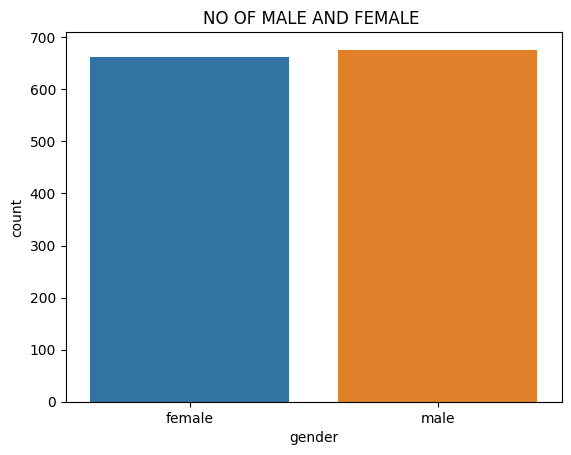

In [9]:
sns.countplot(data,x='gender')
plt.title('NO OF MALE AND FEMALE ')
plt.show()

- female:- 666 ,Male:- 672

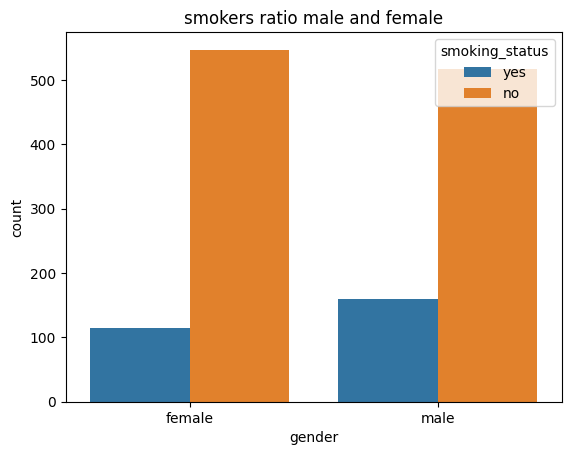

In [10]:
sns.countplot(data,x='gender',hue = 'smoking_status')
plt.title('smokers ratio male and female')
plt.show()

In [11]:
fig = px.pie(data['location'].value_counts().reset_index(), values='location', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text=" Distribution of the Policy Holders")
fig.show()

- Most of the policy holder in southeast(27.2%).

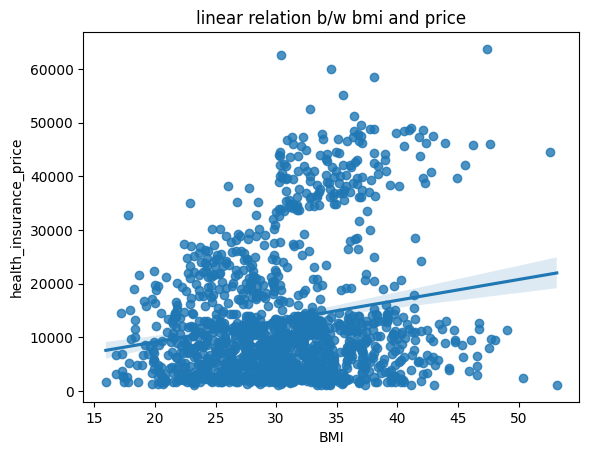

In [12]:
sns.regplot(data,x='BMI',y='health_insurance_price')
plt.title('linear relation b/w bmi and price')
plt.show()

- In this regplot you can see the correlation blw 'bmi' and  'health_ins_price' can be observed  that these point not highly correlated because it not follow upward trend  , point scatter down .

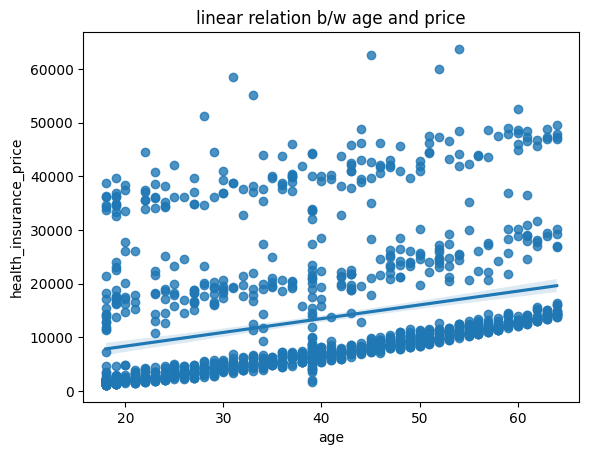

In [13]:
sns.regplot(data,x='age',y='health_insurance_price')
plt.title('linear relation b/w age and price')
plt.show()

- In the regplot,the correlation between  'age' and 'health_ins_price'. it show low corelation.

In [14]:
fig =  px.scatter(data,x='BMI',y='health_insurance_price',color= 'smoking_status',facet_col='location',facet_row= 'gender') # draw scatter plot using ploty library.
fig.update_layout(title = "correlation b/w 'BMI' and 'Health_insurance_price' in different region ")
fig.show()

- In the scatter plot, which is divided into regions and genders, a distinct pattern emerges. It becomes evident that both male and female smokers tend to have higher insurance prices compared to non-smokers.

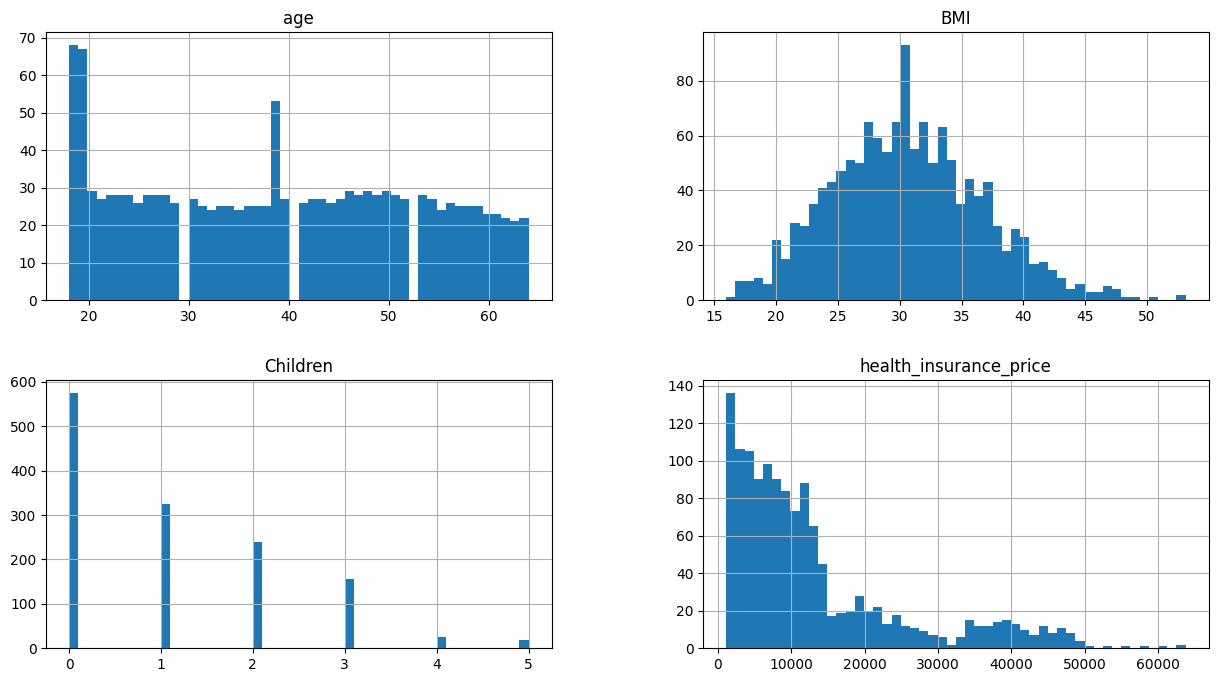

In [15]:

data.hist(bins = 50,figsize= (15,8))

plt.show()

In [16]:
# draw boxplot  using ploty library.
fig = px.box(data,y='BMI') # boxplot  help to detect outlier.
fig.update_layout(title = 'outlier detection ')
fig.show()

In [17]:
fig =px.box(data,y='health_insurance_price')
fig.update_layout(title = 'outlier detection ')
fig.show()

## CONVERT CATEGORICAL FEATURE INTO NUMERICAL

In [18]:
# USING FEATURE ENCODING TECHNIQUE .
# LABELENCODER-
encoder = LabelEncoder()  #
encoder.fit(data['gender'])
encoders =  encoder.transform(data['gender'])

In [19]:
ss_encoders =  encoder.fit_transform(data['smoking_status'])
loc_encoders =  encoder.fit_transform(data['location'])

In [20]:
print(encoders)
print(ss_encoders)
print(loc_encoders)

[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]


- Gender :- {male:1,female : 0}
- smokers :- {yes: 1 ,no :0}
- location :- {sw : 3,se : 2 ,nw : 1 ,ne:0}


In [21]:
# assign encoding value in dataset.
data['gender'] =  encoders    
data['smoking_status'] = ss_encoders
data['location'] = loc_encoders

In [22]:
data.head() # new dataframe with encoding value.

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520


In [23]:
rel =data.corr() # checking corr. relation  between  feature 
rel

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
age,1.000000,-0.017327,0.107637,0.041057,-0.021401,0.006794,0.294387
gender,-0.017327,1.000000,0.047370,0.017163,0.076185,0.004588,0.058559
BMI,0.107637,0.047370,1.000000,0.009742,0.003520,0.153180,0.194278
Children,0.041057,0.017163,0.009742,1.000000,0.007673,0.016569,0.067302
smoking_status,-0.021401,0.076185,0.003520,0.007673,1.000000,-0.002181,0.785603
location,0.006794,0.004588,0.153180,0.016569,-0.002181,1.000000,-0.005372
health_insurance_price,0.294387,0.058559,0.194278,0.067302,0.785603,-0.005372,1.000000


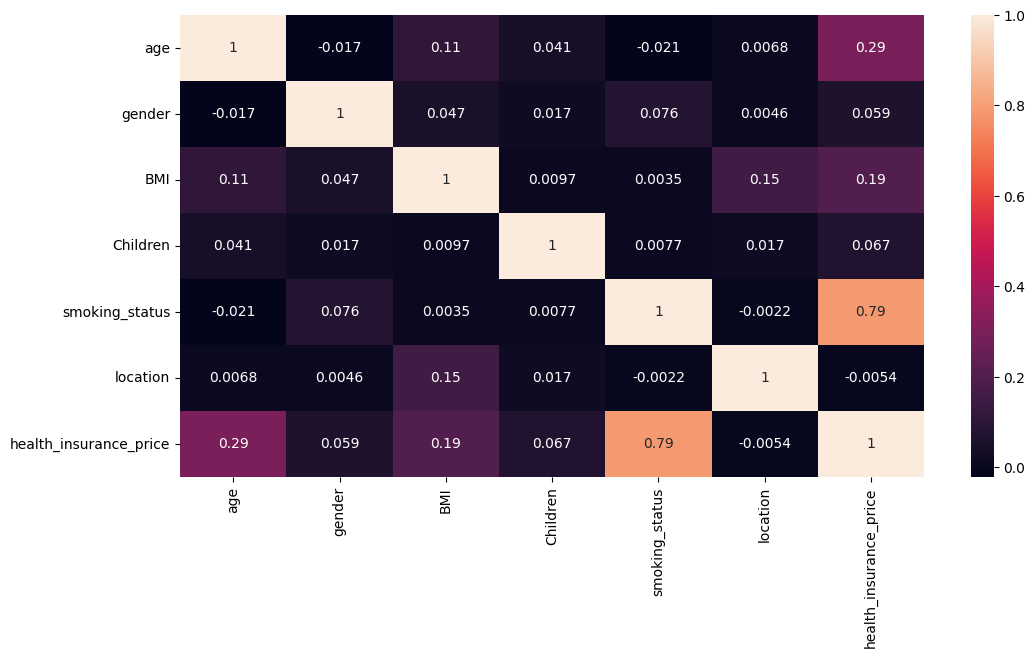

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(rel,annot =True)
plt.show()

- In the heatmap ,we can observe that only one feature show high correlation  with  the ins_price another feature have low corrlation .
- many features show negative correlation .

# DETECTING OUTLIER  AND DEALING WITH IT


Remove outlier using interquartile method / measure of dispersion

In [25]:
Q1 = np.percentile(data['BMI'],25)  # finding the value  q1,q2,q3
Q2  = np.percentile(data['BMI'],50)
Q3  = np.percentile(data['BMI'],75)
print('quartile one:-',Q1)
print('quartile two:-',Q2)
print('quartile three:-',Q3)

quartile one:- 26.315
quartile two:- 30.305
quartile three:- 34.43


In [26]:
IQR = Q3-Q1   
LOWER_FENCE = Q1-1.5*IQR
UPPER_FENCE =  Q3 + 1.5*IQR
print('lower fence:-',LOWER_FENCE)
print('Upper fence:-',UPPER_FENCE)
outlier = []
for i in data['BMI']:
     if (i>UPPER_FENCE)or (i<LOWER_FENCE):
          outlier.append(i)
print('outlier:-',outlier)

lower fence:- 14.142500000000004
Upper fence:- 46.6025
outlier:- [49.06, 48.07, 47.52, 46.75, 47.41, 46.7, 50.38, 47.6, 52.58, 47.74, 53.13]


In [27]:
df =  data[data['BMI']<UPPER_FENCE]

In [28]:
df.shape

(1327, 7)

In [29]:
fig= px.box(df,y='BMI')
fig.show()

In [30]:
Q1 = np.percentile(data['health_insurance_price'],25)
Q2  = np.percentile(data['health_insurance_price'],50)
Q3  = np.percentile(data['health_insurance_price'],75)
print('quartile one:-',Q1)
print('quartile two:-',Q2)
print('quartile three:-',Q3)

quartile one:- 4746.521225
quartile two:- 9382.033
quartile three:- 16584.318157499998


In [31]:
IQR = Q3-Q1
LOWER_FENCE = Q1-1.5*IQR
UPPER_FENCE =  Q3 + 1.5*IQR
print('iqr:-',IQR)
print('lower fence:-',LOWER_FENCE)
print('Upper fence:-',UPPER_FENCE)
outlier = []
for i in data['health_insurance_price']:
     if (i>UPPER_FENCE)or (i<LOWER_FENCE):
          outlier.append(i)
print('outlier:-',outlier)

iqr:- 11837.796932499998
lower fence:- -13010.174173749994
Upper fence:- 34341.01355624999
outlier:- [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 34439.8559, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 4027

In [32]:
df =  data[data['health_insurance_price']<UPPER_FENCE]

In [33]:
df.shape

(1197, 7)

In [34]:
fig  = px.box(df,y='health_insurance_price')
fig.show()

# DEALING WITH SKEWNESS DATA

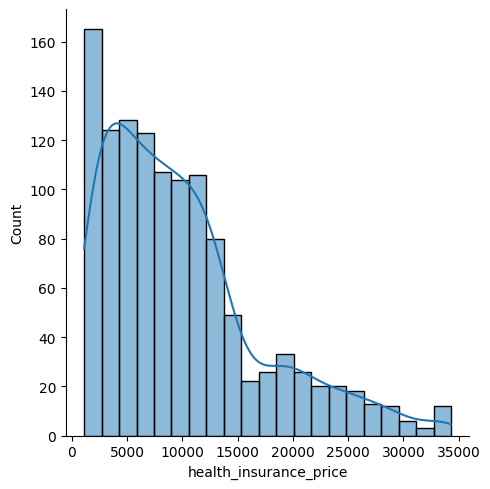

In [35]:
sns.displot(df,x='health_insurance_price',kde = True)
plt.show()

In [36]:
df.shape

(1197, 7)

- Log transformation method

In [37]:
df['health_insurance_price'] = np.log(df['health_insurance_price'])
df

C:\Users\ashis\AppData\Local\Temp\ipykernel_5464\2604436868.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,30.305,0,1,3,9.734176
1,18.0,1,33.770,1,0,2,7.453302
2,28.0,1,33.000,3,0,2,8.400538
3,33.0,1,22.705,0,0,1,9.998092
4,32.0,1,28.880,0,0,1,8.260197
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,9.268661
1334,18.0,0,31.920,0,0,0,7.698927
1335,18.0,0,36.850,0,0,2,7.396233
1336,21.0,0,25.800,0,0,3,7.604867


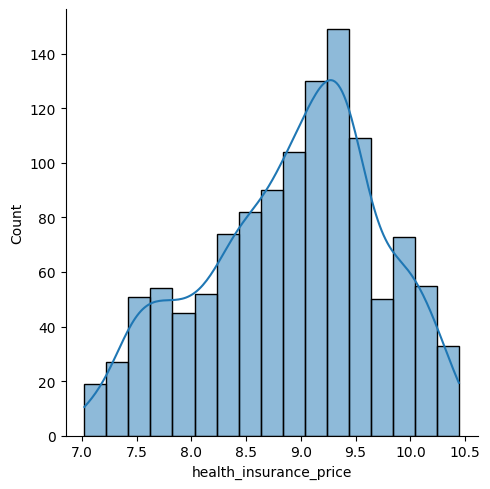

In [38]:
sns.displot(df,x='health_insurance_price',kde= True)
plt.show()

# TRAIN - TEST MODEL 

In [39]:
x =  df.iloc[:,0:-1] # intialize x variable /independent variable
y = df.iloc[:,-1]    # intialize y variable /dependent variable


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=50)   # spliting data  train-testvmethod  ,taking 80% train data ,20% test data.
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(957, 6)
(240, 6)
(957,)
(240,)


- Feature scaling

In [41]:
sc = StandardScaler() # import standardscaler function 
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [42]:
health_data = pd.DataFrame(x_train,columns= ['age','gender','BMI','Children','smoking_status','location'])  # create new datafram
health_data.head()

,age,gender,BMI,Children,smoking_status,location
0,-0.002634,1.039440,-1.372023,-0.065104,-0.349174,-0.445830
1,-1.011030,-0.962057,0.031656,-0.884901,-0.349174,1.362049
2,-0.290747,1.039440,1.410417,-0.065104,-0.349174,1.362049
3,-0.218719,-0.962057,-0.699254,-0.065104,-0.349174,1.362049
4,-0.722917,1.039440,-0.062200,0.754693,-0.349174,-0.445830


In [43]:
health_data.describe().round(2)

,age,gender,BMI,Children,smoking_status,location
count,957.00,957.00,957.00,957.00,957.00,957.00
mean,0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.52,-0.96,-2.35,-0.88,-0.35,-1.35
25%,-0.94,-0.96,-0.72,-0.88,-0.35,-0.45
50%,-0.00,-0.96,-0.05,-0.07,-0.35,-0.45
75%,0.86,1.04,0.62,0.75,-0.35,0.46
max,1.80,1.04,3.82,3.21,2.86,1.36


- import linear regression model

In [44]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

# MODEL EVALUATION 


In [45]:
pred =  lm.predict(x_test)
pred

array([ 9.67178768,  9.4672648 ,  8.17351216,  8.13494089,  9.41454439,
        9.50291118,  7.87953357,  8.24085109,  9.45664025,  8.20050093,
        8.30488723,  8.15275364,  8.33179732,  9.31945976,  9.1237088 ,
        8.50371195,  9.97909427,  9.33422022,  9.38896989,  8.92025399,
        9.54747583,  8.5935909 , 10.36123536, 10.90414696,  8.85633732,
       10.3851118 ,  8.56428169,  9.47037129,  8.86199315,  7.89878383,
        8.73848793,  7.88693228,  9.54916615, 10.65237408,  9.98241562,
        7.90694003,  9.38942573,  9.37934349,  8.81286762,  9.87800627,
        9.31208121, 10.39937695,  8.21857264,  9.19813247,  8.11847388,
        7.76796867,  8.49903875,  8.27964288,  8.69702661, 10.09101516,
        9.40296842,  9.08495734,  8.78319027,  8.12436107,  8.90169592,
        9.66380178, 10.09033319,  8.86453341,  8.17040312,  8.32628564,
        9.28590461,  8.19927122,  8.93874252,  9.59974989,  7.87440643,
        9.25340031,  8.21538424,  9.27807152,  9.49790067,  9.10

In [46]:
y_test

762      9.854343
1145     9.331594
507      8.031741
324      7.960704
824      9.435371
          ...    
916      9.988487
528      9.029167
115     10.317582
938      7.742403
802      7.651158
Name: health_insurance_price, Length: 240, dtype: float64

In [47]:
lm.score(x_test,y_test) # accuracy score

0.7032861636901284

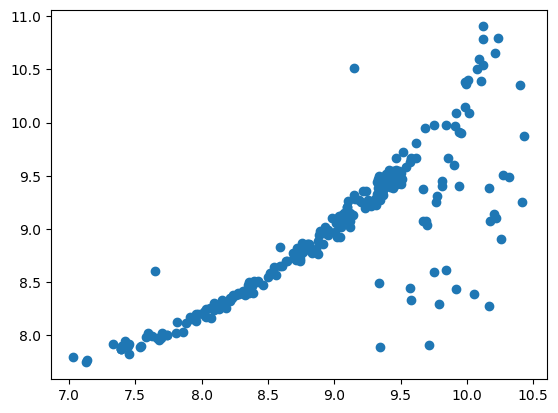

In [48]:
plt.scatter(y_test,pred)

In [49]:
from sklearn.metrics  import mean_squared_error
mse =  mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)


print('mse:-',mse)
print('rmse:-',rmse)

mse:- 0.19598454433045992
rmse:- 0.4427014166799785


In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
print(r2)

0.7032861636901284


# DecisionTreeRegressor MODEL 

In [51]:
Dt =  DecisionTreeRegressor()
Dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [52]:
Dt.score(x_test,y_test) #accuracy score

0.4140306665721788

In [53]:
Dt_pred =  Dt.predict(x_test)
print(Dt_pred)

[ 9.88937315 10.31106977  8.06479687  8.08954352  9.44382204  9.41196018
  7.39153144 10.02098875  9.35118043  7.98175539  9.88701948  7.92118033
  8.06479687  9.26876325  9.06024017  8.58561317  9.83989459  9.31412571
  9.44321082  9.08051285  9.48926631  8.82459818  9.98834981 10.11323858
 10.21741852  9.76974505  8.56507378  9.53566479  8.90356731  7.39913713
  8.69523639  7.39790734  9.38277737 10.29293051  9.76202572  7.47847019
  9.32762345  9.68897924  8.86087396 10.0053233   9.76150226  9.96287262
  7.89733878  9.93451535  7.76736096  7.13404268  8.40164825  8.18307023
  8.57775567 10.01375651  9.35585102  9.02816956  8.73210323  7.81332236
  8.94256207  9.70842768  9.79280887  8.729769    7.91110226  8.29102658
  9.13797327  8.02698955  8.88315374  9.79490552  7.39100837  9.78405663
  7.95253095  9.3138638   9.36987762  8.9855048   9.05247776  8.07293258
  9.22435532  9.05996196  8.30413814 10.02031902  9.19802563  9.85025406
  9.55627044  8.42757764  9.40447345  8.58561317  8

In [54]:
y_test

762      9.854343
1145     9.331594
507      8.031741
324      7.960704
824      9.435371
          ...    
916      9.988487
528      9.029167
115     10.317582
938      7.742403
802      7.651158
Name: health_insurance_price, Length: 240, dtype: float64

# RandomForest Model

In [55]:
Rf = RandomForestRegressor(n_estimators=500)
Rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [56]:
Rf.score(x_test,y_test)  # accuracy score

0.6935344496019433

In [57]:
rf_pred =  Rf.predict(x_test) 

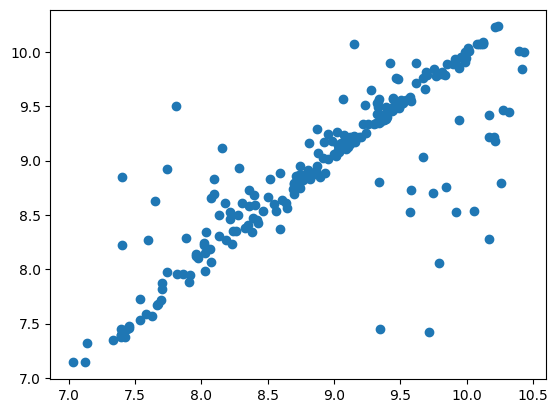

In [58]:
plt.scatter(y_test,rf_pred)

In [59]:
from sklearn.metrics  import mean_squared_error
mse =  mean_squared_error(y_test,rf_pred)
rmse = np.sqrt(mse)


print('mse:-',mse)
print('rmse:-',rmse)

mse:- 0.2024257176366415
rmse:- 0.4499174564702302


# Support Vector Model

In [60]:
sv = svm.SVR(kernel='linear')
sv.fit(x_train,y_train)

SVR(kernel='linear')

In [61]:
sv.score(x_test,y_test) # accuracy score

0.6787868164191047

In [62]:
sv_pred = sv.predict(x_test)

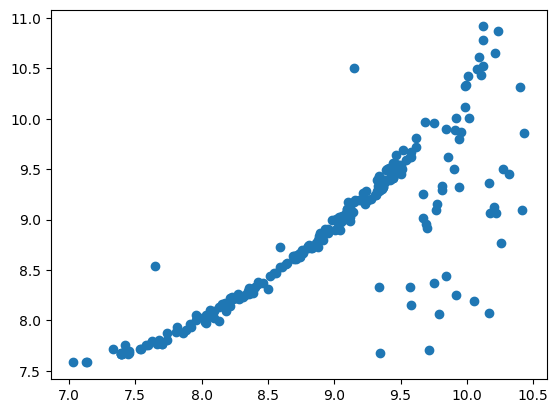

In [63]:
plt.scatter(y_test,sv_pred)

In [64]:
from sklearn.metrics  import mean_squared_error
mse =  mean_squared_error(y_test,rf_pred)
rmse = np.sqrt(mse)


print('mse:-',mse)
print('rmse:-',rmse)

mse:- 0.2024257176366415
rmse:- 0.4499174564702302


# K - neighbor Model

In [65]:
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20)

In [66]:
knn.score(x_test,y_test) # accuracy score

0.7469481991679434

In [67]:
knn_pred =  knn.predict(x_test)

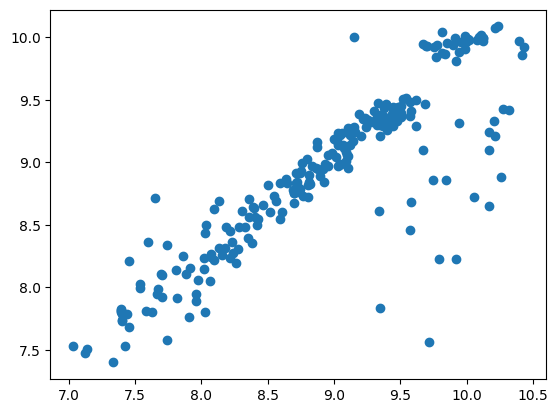

In [68]:
plt.scatter(y_test,knn_pred)

In [69]:
from sklearn.metrics  import mean_squared_error
mse =  mean_squared_error(y_test,knn_pred)
rmse = np.sqrt(mse)


print('mse:-',mse)
print('rmse:-',rmse)

mse:- 0.1671450259780923
rmse:- 0.40883373879621565


- Most appropriate model  Knn-neighbor model.
- Knn-neighbor Regression model accuaracy score 74% as compare to other model .


1- Why is this proposal important in today’s world? How predicting a health insurance cost accurately can affect the health care/insurance field?    
 - Cost Efficiency
 - Improved Customer Experience
 - Financial Planning


2- If any, what is the gap in the knowledge, or how your proposed method can be helpful if required in the future for any other type of insurance?


3-  Please aim to identify patterns in the data and important features that may impact an ML model.


4- Please perform multiple machine learning models, perform all required steps to check if there are any assumptions, and justify your model. Why is your model better than any other possible model? Please explain it by relevant cost functions and, if possible, by any graph.